In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# File to Load

spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head(20)

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
5,Green Onions,Booker T. & the M.G.'s,64,1962,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,10,-8.741,136.837,176333
6,Christmas (Baby Please Come Home),Darlene Love,73,1963,Christmas Soul,r&b,neo soul,3,-7.146,126.322,166453
7,Winter Wonderland,Aretha Franklin,45,1964,Christmas Soul,r&b,neo soul,7,-8.026,106.274,132107
8,Turn! Turn! Turn! (To Everything There Is a Se...,The Byrds,42,1965,Classic Rock,rock,classic rock,2,-8.170,124.594,229533
9,Que Bueno Baila Usted,Beny Moré,40,1965,Cuban vibes only,r&b,urban contemporary,5,-9.712,172.230,196933


In [2]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [3]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [4]:
#For Key Data : by key data person
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107,F#


In [5]:
#Categorize and Establish Bins for Popularity
size_bins = (-1, 30, 60, 90, 100)
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)'] 

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])

#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107


In [6]:
#Key Data

#Drop un-needed columns
key_df = spotify_df.drop(columns={'Release Date', 'Playlist Name', 'Genre',
                         'Subgenre', 'Loudness', 'Tempo', 'Duration (ms)'})

#Print data frame
key_df

,Artist,Popularity,Popularity Sectors,Key,Key Assignment
Track Name,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),5,F
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),11,B
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),7,G
At Last - Single Version,Etta James,15,Least Popular (<30),5,F
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),10,A#
...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),3,D#
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),0,C
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),6,F#


In [7]:
#Group and Count each letter in Key Assignment
key_group = key_df.groupby(['Key Assignment']).size()
key_group

Key Assignment
A     3027
A#    2273
B     2996
C     3454
C#    4010
D     2827
D#     913
E     2201
F     2680
F#    2670
G     3352
G#    2430
dtype: int64

In [8]:
#Group by Popularity Sectors and sort 
key_group_2 = key_df.groupby(['Popularity Sectors'])['Key Assignment'].value_counts()
key_group_2 =pd.DataFrame(key_group_2)
#key_group_2 = key_group_2.sort_values('Key Assignment')

#Print data frame
key_group_2

count
Popularity Sectors          Key Assignment       
Least Popular (<30)         C#               1195
                            G                1133
                            C                1023
                            B                 913
                            D                 905
                            A                 904
                            F#                820
                            F                 815
                            E                 695
                            A#                682
                            G#                638
                            D#                285
Low to Mid Popular (30-59)  C#               1696
                            C                1452
                            G                1383
                            A                1293
                            B                1259
                            D                1183
                            F                1133
                            F#               1113
                            G#               1070
                            A#                973
                            E                 924
                            D#                404
Mid to High Popular (60-89) C#               1087
                            C                 969
                            A                 811
                            B                 802
                            G                 792
                            F                 724
                            G#                711
                            D                 711
                            F#                704
                            A#                580
                            E                 575
                            D#                224
Most Popular (90-100)       G                  44
                            A#                 38
                            F#                 33
                            C#                 32
                            D                  28
                            B                  22
                            A                  19
                            G#                 11
                            C                  10
                            F                   8
                            E                   7
                            D#                  0

In [11]:
#Group by individual bin
key_group_5=key_group_2.loc['Least Popular (<30)']

#Calculate each key percentage of key in bin
key_group_5= (key_group_5['count']) / (key_group_5['count'].sum()) * 100

#print
key_group_5

Key Assignment
C#    11.940448
G     11.320943
C     10.221823
B      9.122702
D      9.042766
A      9.032774
F#     8.193445
F      8.143485
E      6.944444
A#     6.814548
G#     6.374900
D#     2.847722
Name: count, dtype: float64

In [9]:
#Grouop by individual bin
key_group_3=key_group_2.loc['Low to Mid Popular (30-59)']

#Calaculate each key percentage of key in bin
key_group_3= (key_group_3['count']) / (key_group_3['count'].sum()) * 100

#print
key_group_3


Key Assignment
C#    12.216380
C     10.458835
G      9.961824
A      9.313549
B      9.068645
D      8.521213
F      8.161060
F#     8.016999
G#     7.707268
A#     7.008572
E      6.655622
D#     2.910034
Name: count, dtype: float64

In [10]:
#Group by individual bin
key_group_4=key_group_2.loc['Mid to High Popular (60-89)']

#Calculate each key percentage of key in bin
key_group_4= (key_group_4['count']) / (key_group_4['count'].sum()) * 100

#print
key_group_4

Key Assignment
C#    12.508631
C     11.150748
A      9.332566
B      9.228999
G      9.113924
F      8.331415
G#     8.181818
D      8.181818
F#     8.101266
A#     6.674338
E      6.616801
D#     2.577675
Name: count, dtype: float64

In [12]:
#Group by individual bin
key_group_6=key_group_2.loc['Most Popular (90-100)']

#Calculate each key percentage of key in bin
key_group_6= (key_group_6['count']) / (key_group_6['count'].sum()) * 100

#print
key_group_6

Key Assignment
G     17.460317
A#    15.079365
F#    13.095238
C#    12.698413
D     11.111111
B      8.730159
A      7.539683
G#     4.365079
C      3.968254
F      3.174603
E      2.777778
D#     0.000000
Name: count, dtype: float64

In [13]:
#Create a data frame with each bin
key_popularity = pd.DataFrame({"Most Popular (90-100)": key_group_6,
                       "Mid to High Popular (60-89)": key_group_4,
                       "Low to Mid Popular (30-59)": key_group_3,
                       "Least Popular (<30)": key_group_5}) 

#Print
key_popularity

,Most Popular (90-100),Mid to High Popular (60-89),Low to Mid Popular (30-59),Least Popular (<30)
Key Assignment,,,,
A,7.539683,9.332566,9.313549,9.032774
A#,15.079365,6.674338,7.008572,6.814548
B,8.730159,9.228999,9.068645,9.122702
C,3.968254,11.150748,10.458835,10.221823
C#,12.698413,12.508631,12.216380,11.940448
D,11.111111,8.181818,8.521213,9.042766
D#,0.000000,2.577675,2.910034,2.847722
E,2.777778,6.616801,6.655622,6.944444
F,3.174603,8.331415,8.161060,8.143485


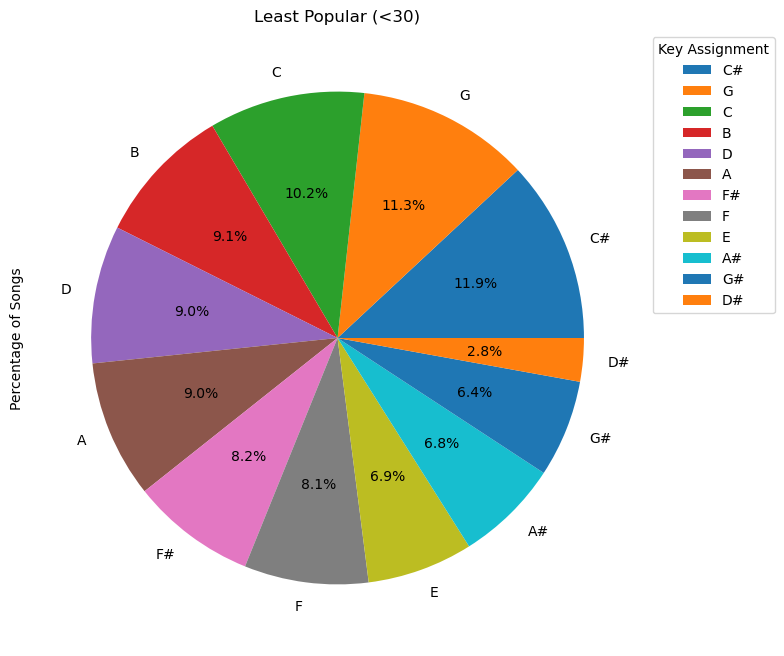

In [14]:
#Create bar graph with individual bin
pie_5= key_group_5
pie_5.plot(kind='pie', figsize=(10,8), title= 'Least Popular (<30)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

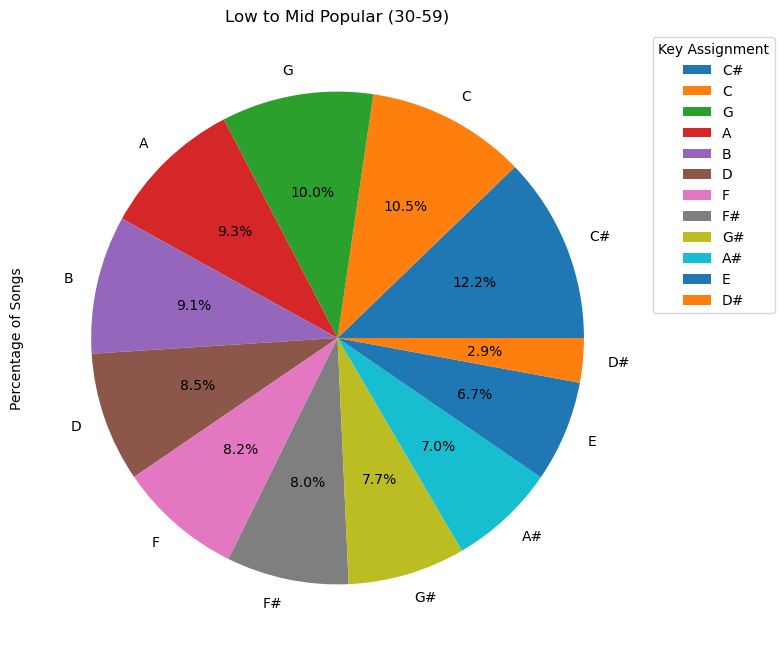

In [15]:
#Create bar graph with individual bin
pie_3= key_group_3
pie_3.plot(kind='pie', figsize=(10,8), title= 'Low to Mid Popular (30-59)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

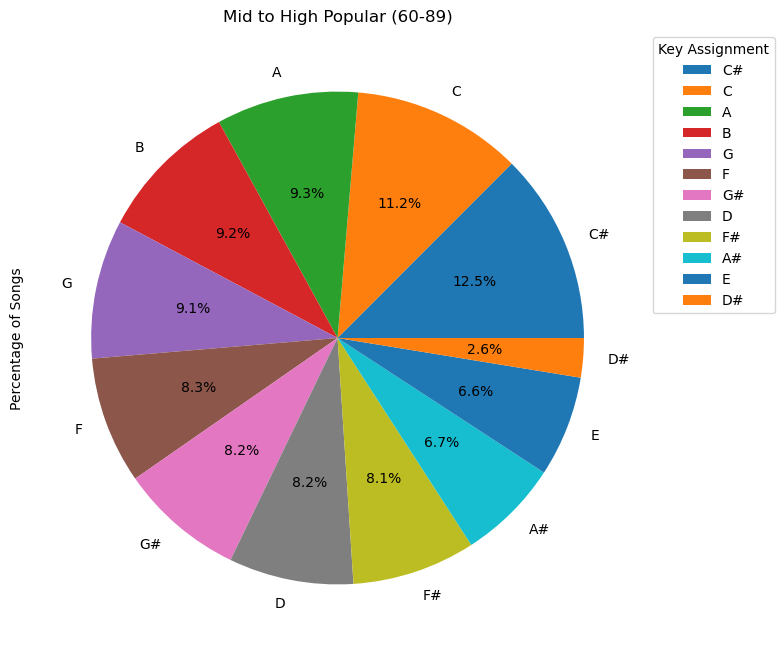

In [16]:
#Create bar graph with individual bin
pie_4= key_group_4
pie_4.plot(kind='pie', figsize=(10,8), title= 'Mid to High Popular (60-89)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

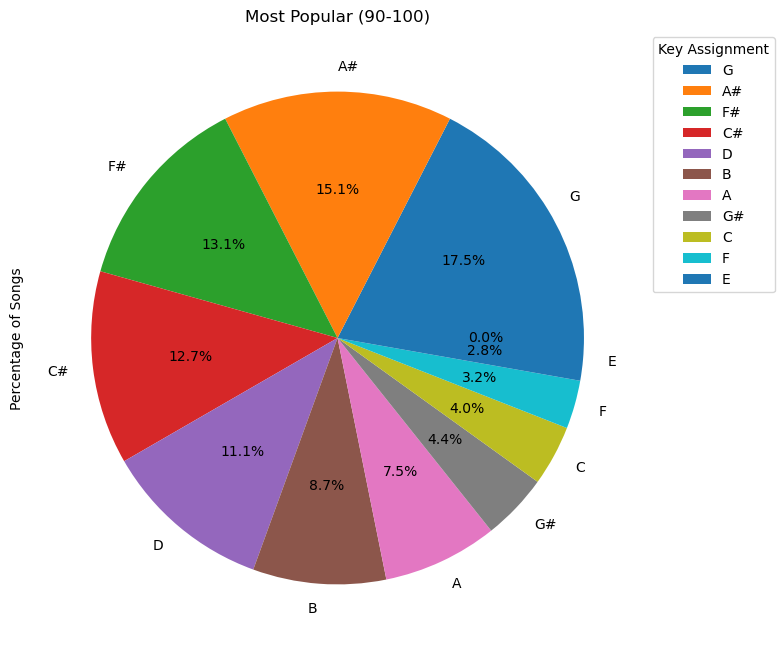

In [17]:
#Create bar graph with individual bin
pie_6= key_group_6
pie_6.plot(kind='pie', figsize=(10,8), title= 'Most Popular (90-100)',
           xlabel='Key Assignment', ylabel="Percentage of Songs",autopct="%1.1f%%")
plt.legend(title='Key Assignment', bbox_to_anchor=(1, 1))
plt.show()

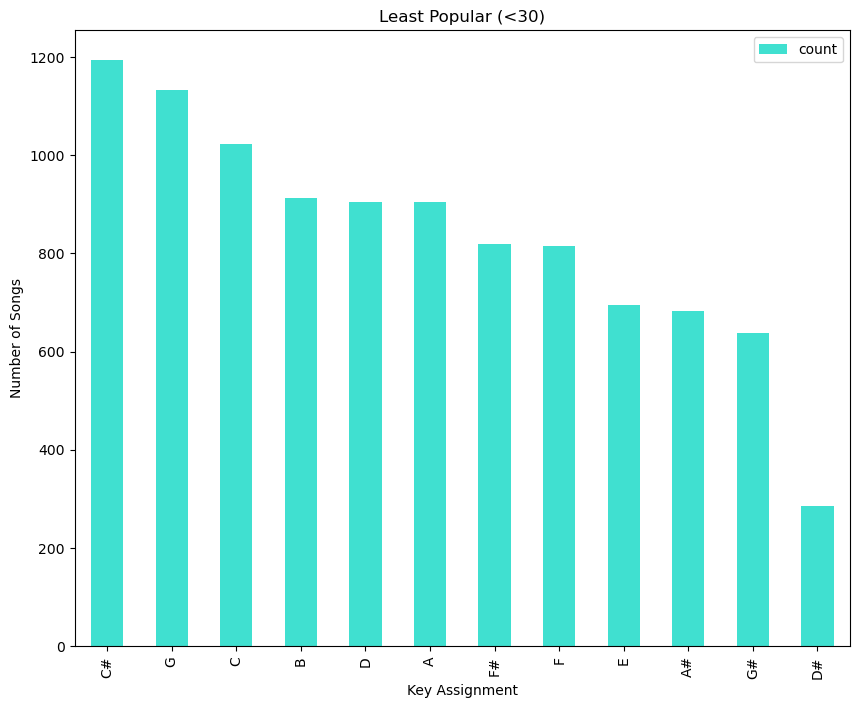

In [18]:
#Create bar graph with individual bin
bar_5= key_group_2.loc['Least Popular (<30)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Least Popular (<30)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='turquoise')
plt.show()

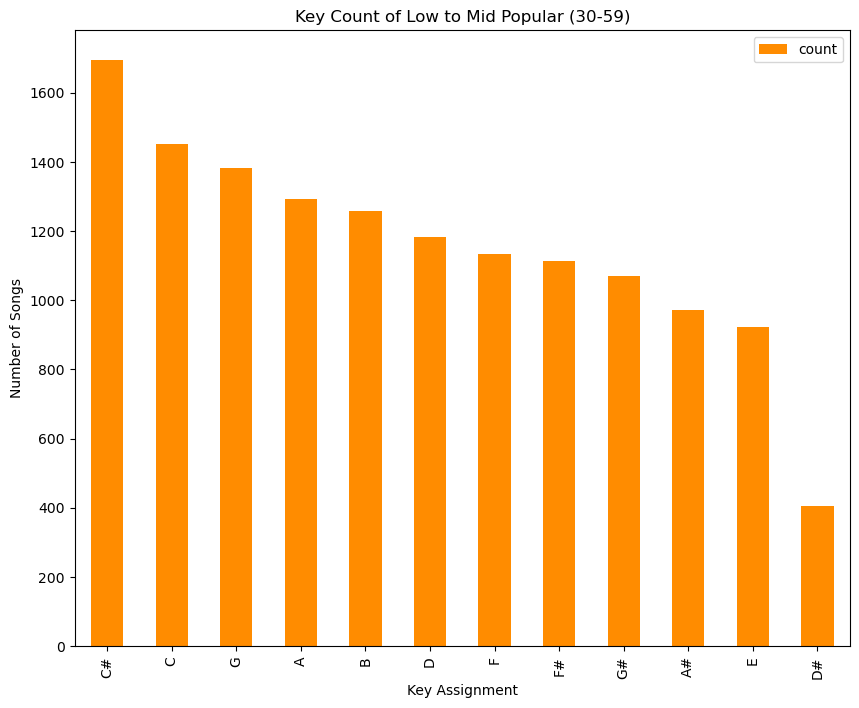

In [19]:
#Create bar graph with individual bin
bar_4= key_group_2.loc['Low to Mid Popular (30-59)']
bar_4.plot(kind='bar', figsize=(10,8), title= 'Key Count of Low to Mid Popular (30-59)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='darkorange')
plt.show()

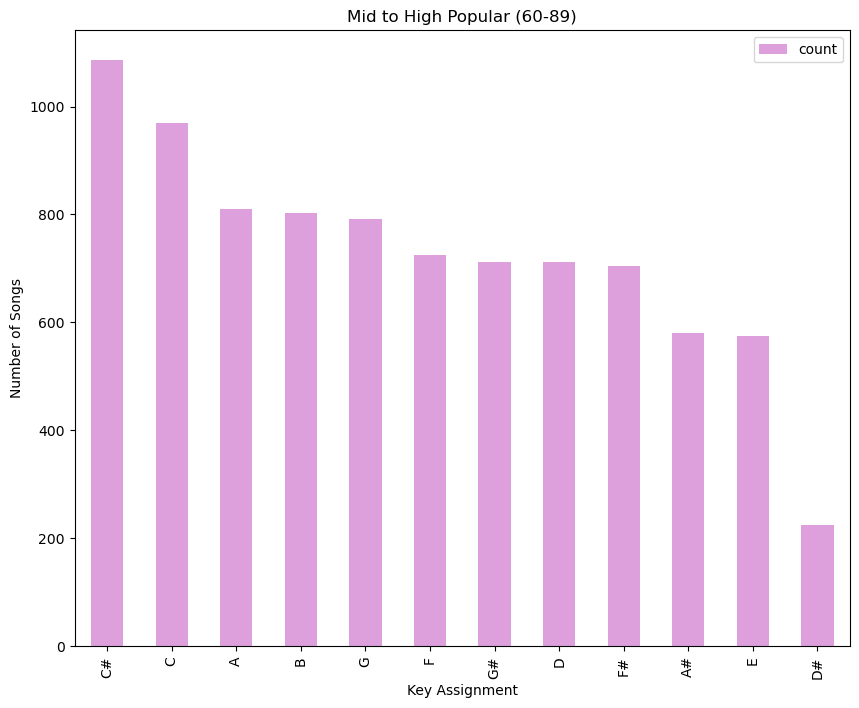

In [64]:
#Create bar graph with individual bin
bar_5= key_group_2.loc['Mid to High Popular (60-89)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Mid to High Popular (60-89)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='plum')
plt.show()

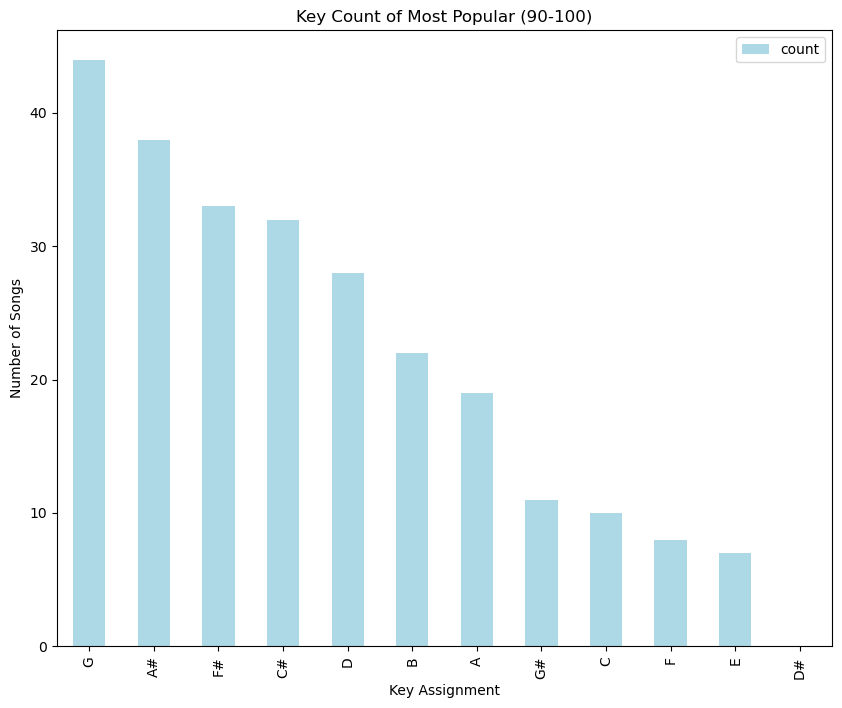

In [65]:
#Create bar graph with individual bin
bar_1= key_group_2.loc['Most Popular (90-100)']
bar_1.plot(kind='bar', figsize=(10,8), title= 'Key Count of Most Popular (90-100)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='lightblue')
plt.show()

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(spotify_df['Key'], spotify_df['Popularity'])

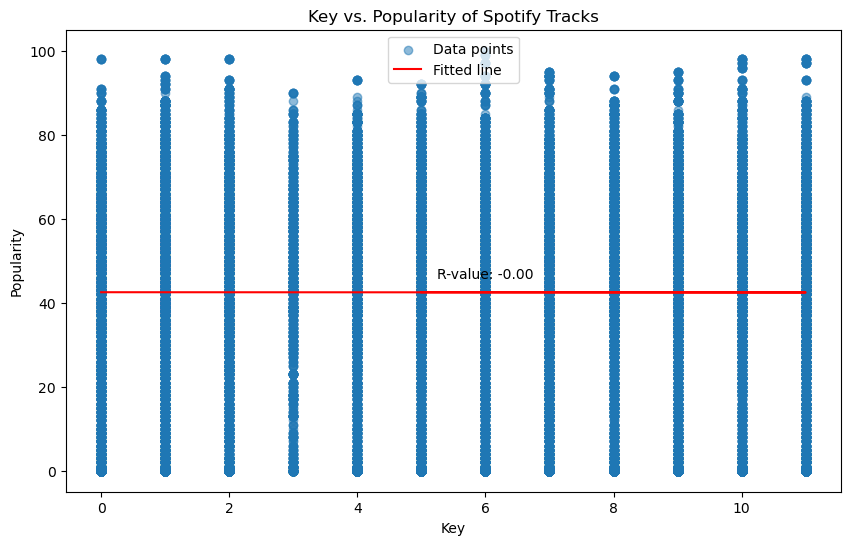

In [23]:
# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Key'], spotify_df['Popularity'], alpha=0.5, label='Data points')
plt.plot(spotify_df['Key'], intercept + slope*spotify_df['Key'], 'r', label='Fitted line')
key_mid_point = np.median(spotify_df['Key'])
popularity_at_mid_point = intercept + slope * key_mid_point
plt.annotate(f'R-value: {r_value:.2f}', (key_mid_point, popularity_at_mid_point), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Key vs. Popularity of Spotify Tracks')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.legend()
plt.show()

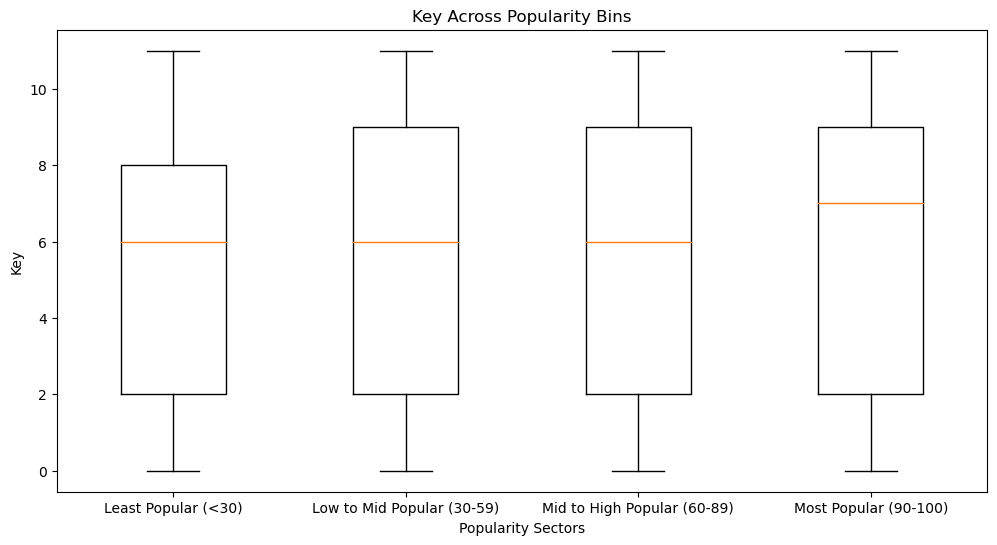

In [73]:
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)']

# Box plot for key across popularity bins
plt.figure(figsize=(12, 6))
plt.boxplot([spotify_df[spotify_df['Popularity Sectors'] == label]['Key'] for label in labels], labels=labels)
plt.title('Key Across Popularity Bins')
plt.ylabel('Key')
plt.xlabel('Popularity Sectors')
plt.show()